In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


file_path = 'API_Endpoint.json'  # Replace with the correct file path if needed
with open(file_path, 'r') as file:
    data = json.load(file)

In [2]:
# Normalize JSON into a DataFrame
df = pd.json_normalize(data)
# Ensure the 'accuracy' column is treated as a string before replacing '%'
df['accuracy'] = df['accuracy'].astype(str).str.replace('%', '').str.strip()

# Convert the cleaned accuracy to numeric values
df['accuracy_percentage'] = pd.to_numeric(df['accuracy'], errors='coerce')

# Display summary statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
                  id    quiz_id       score  trophy_level  correct_answers  \
count      14.000000  14.000000   14.000000     14.000000        14.000000   
mean   312368.428571  31.500000   60.285714      2.214286        15.071429   
std     38889.139814  20.346045   34.675260      0.699293         8.668815   
min    195808.000000   6.000000   12.000000      1.000000         3.000000   
25%    316613.250000  18.000000   36.000000      2.000000         9.000000   
50%    324964.000000  24.500000   46.000000      2.000000        11.500000   
75%    332307.500000  51.000000   88.000000      3.000000        22.000000   
max    336497.000000  58.000000  116.000000      3.000000        29.000000   

       incorrect_answers  better_than  total_questions  mistakes_corrected  \
count          14.000000    14.000000         14.00000           14.000000   
mean            5.857143   160.000000         55.50000            2.857143   
std             6.948792   126.353594      

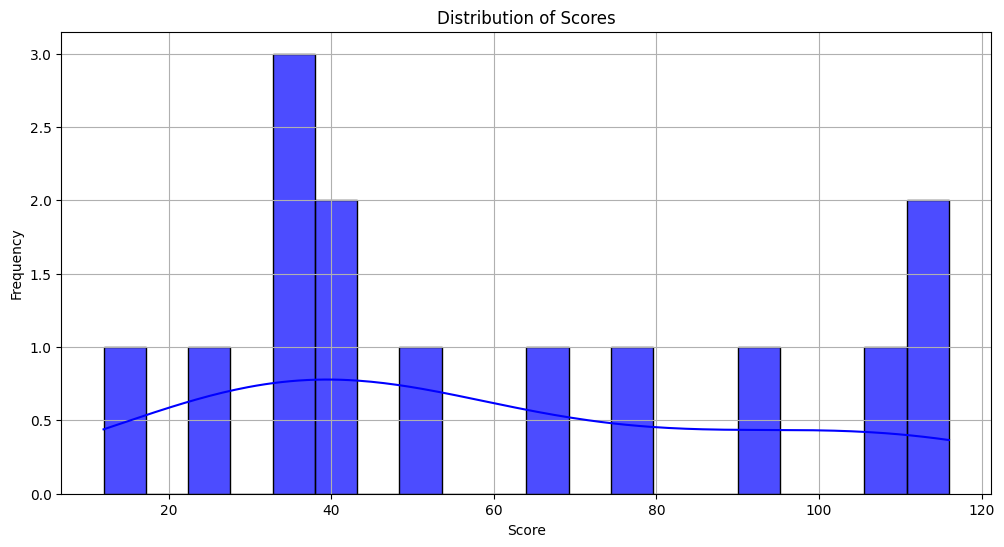

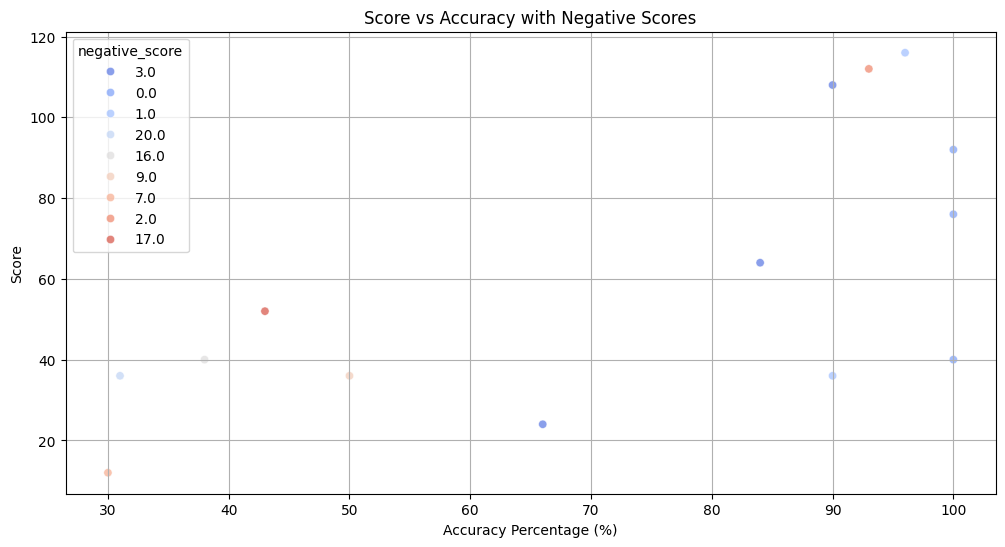

Number of high accuracy attempts (>90%): 5


In [98]:
# Visualization: Distribution of Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['score'], kde=True, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Score vs Accuracy
plt.figure(figsize=(12, 6))
sns.scatterplot(x='accuracy_percentage', y='score', hue='negative_score', data=df, palette='coolwarm', alpha=0.7)
plt.title('Score vs Accuracy with Negative Scores')
plt.xlabel('Accuracy Percentage (%)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Additional insights
high_accuracy = df[df['accuracy_percentage'] > 90]
print(f"Number of high accuracy attempts (>90%): {len(high_accuracy)}")

In [132]:
df['submitted_at'] = pd.to_datetime(df['submitted_at'])

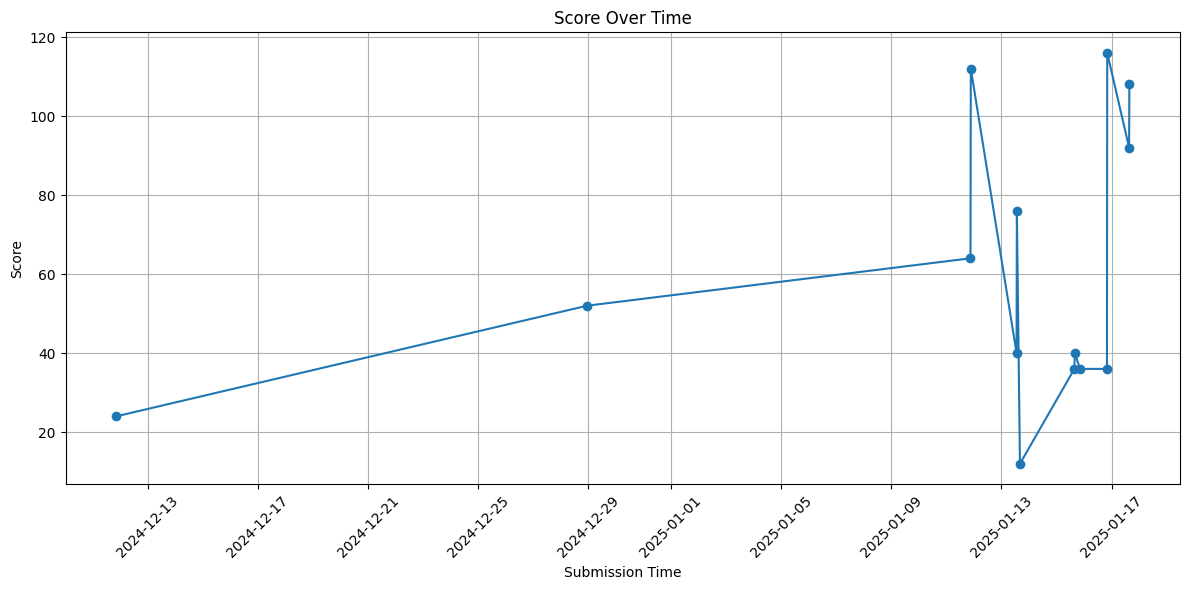

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['submitted_at'], df['score'], marker='o', linestyle='-')
plt.title('Score Over Time')
plt.xlabel('Submission Time')
plt.ylabel('Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Historical Data

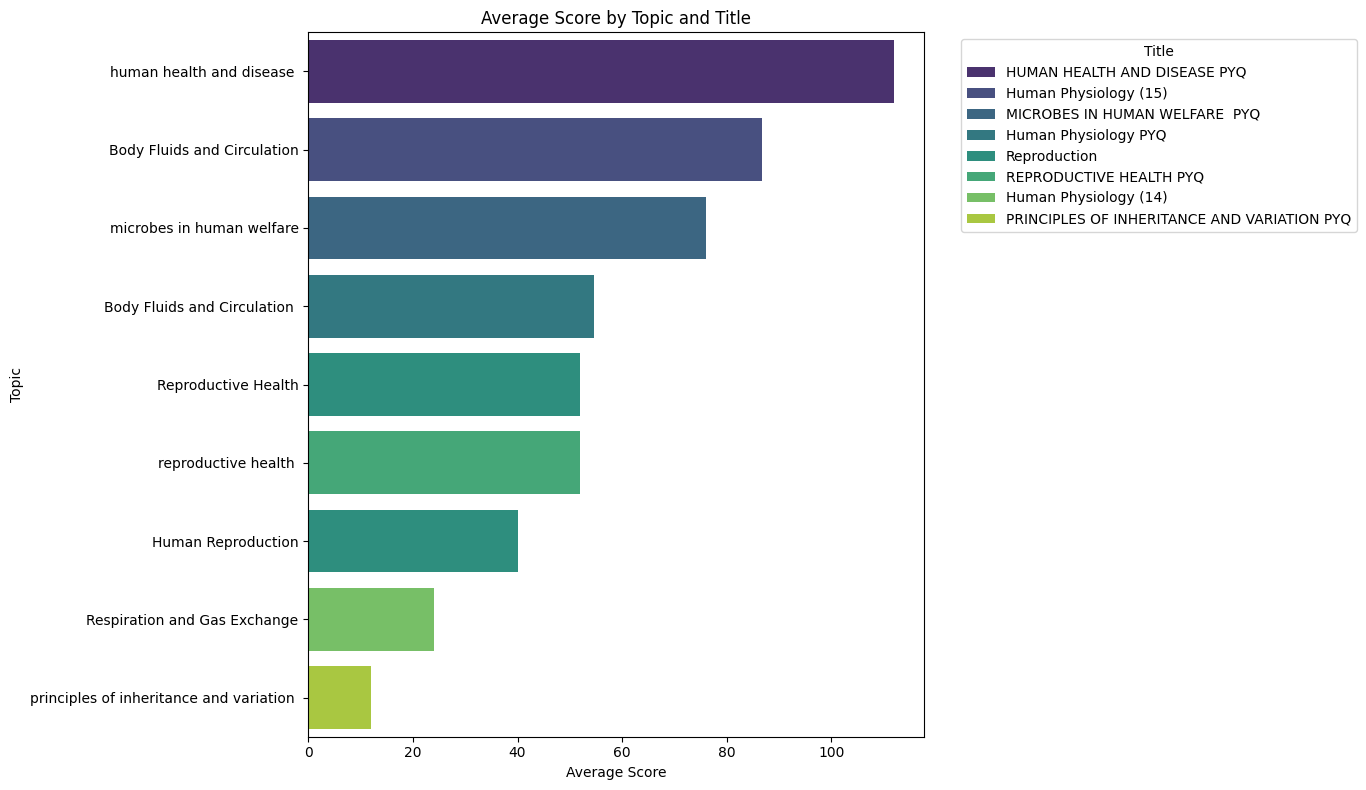

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'topic' and 'title' columns are present in the DataFrame
if 'quiz.topic' in df.columns and 'quiz.title' in df.columns:
    # Group data by topic and title, calculating the mean score
    topic_scores = df.groupby(['quiz.topic', 'quiz.title'])['score'].mean().reset_index()

    # Sort by score for better visualization
    topic_scores = topic_scores.sort_values(by='score', ascending=False)

    # Create a barplot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=topic_scores,
        x='score',
        y='quiz.topic',
        hue='quiz.title',
        palette='viridis'
    )
    plt.title('Average Score by Topic and Title')
    plt.xlabel('Average Score')
    plt.ylabel('Topic')
    plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("The columns 'quiz.topic' and 'quiz.title' are not available in the DataFrame.")


In [101]:
topic_scores = df[['quiz.topic', 'score']]
topic_scores

,quiz.topic,score
0,Body Fluids and Circulation,108
1,Body Fluids and Circulation,92
2,Body Fluids and Circulation,116
3,Body Fluids and Circulation,36
4,Body Fluids and Circulation,36
5,Human Reproduction,40
6,Body Fluids and Circulation,36
7,principles of inheritance and variation,12
8,microbes in human welfare,76
9,reproductive health,40


In [104]:
import json

# Open the JSON file
with open('Quiz_Submission_Data.json', 'r') as f:
    data = json.load(f)

# Access the data (assuming 'data' is a dictionary)
print(data)  # Print the entire dictionary

# Access specific fields within the data (example)
if 'quiz' in data and 'topic' in data['quiz']:
    print(data['quiz']['topic'])
else:
    print("The keys 'quiz' or 'topic' were not found in the data.")

{'id': 336566, 'quiz_id': 43, 'user_id': '7ZXdz3zHuNcdg9agb5YpaOGLQqw2', 'submitted_at': '2025-01-17T15:51:29.859+05:30', 'created_at': '2025-01-17T15:51:29.871+05:30', 'updated_at': '2025-01-17T15:51:29.871+05:30', 'score': 32, 'trophy_level': 2, 'accuracy': '80 %', 'speed': '100', 'final_score': '30.0', 'negative_score': '2.0', 'correct_answers': 8, 'incorrect_answers': 2, 'source': 'live', 'type': 'topic', 'started_at': '2025-01-17T16:20:44.000+05:30', 'ended_at': '2025-01-17T16:21:28.000+05:30', 'duration': '15:00', 'better_than': 24, 'total_questions': 128, 'rank_text': 'Topic Rank - #2402', 'mistakes_corrected': 6, 'initial_mistake_count': 8, 'response_map': {'1837': 7363, '1848': 7407, '1852': 7423, '1862': 7464, '1877': 7525, '1878': 7529, '1900': 7617, '1917': 7685, '1934': 7750, '1964': 7872}, 'quiz': {'id': 43, 'name': None, 'title': 'Structural Organisation in Animals and Plants (7)', 'description': '', 'difficulty_level': None, 'topic': 'Structural Organisation in Animals'

In [109]:

# Extract the desired fields
topic = data['quiz']['topic']
title = data['quiz']['title']
score = data['score']
id_val = data['id']  # Using 'id_val' to avoid conflict with the built-in 'id'
accuracy = data['accuracy']
speed = data['speed']
final_score = data['final_score']
negative_score = data['negative_score']
correct_answers = data['correct_answers']
incorrect_answers = data['incorrect_answers']

# Print the values
print(f"Topic: {topic}")
print(f"Title: {title}")
print(f"Score: {score}")
print(f"ID: {id_val}")
print(f"Accuracy: {accuracy}")
print(f"Speed: {speed}")
print(f"Final Score: {final_score}")
print(f"Negative Score: {negative_score}")
print(f"Correct Answers: {correct_answers}")
print(f"Incorrect Answers: {incorrect_answers}")

Topic: Structural Organisation in Animals
Title: Structural Organisation in Animals and Plants (7)
Score: 32
ID: 336566
Accuracy: 80 %
Speed: 100
Final Score: 30.0
Negative Score: 2.0
Correct Answers: 8
Incorrect Answers: 2


In [123]:
import json

def load_data(filepath):
    """
    Loads data from a JSON file.

    Parameters:
    filepath (str): The path to the JSON file containing the quiz data.

    Returns:
    dict: The loaded data.
    """
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data

datas = load_data('Quiz_Endpoint.json')



In [124]:
quiz_data = {
    "quiz_id": datas["quiz"]["id"],
    "title": datas["quiz"]["title"],
    "topic": datas["quiz"]["topic"],
    "description": datas["quiz"]["description"],
    "total_questions": len(datas["quiz"]["questions"])
}

In [129]:
questions_data = [
    {
        "question_id": q["id"],
        "quiz_id": datas["quiz"]["id"],
        "description": q["description"],
        "topic": q["topic"],
        "correct_option": [opt["description"] for opt in q["options"] if opt["is_correct"]],
    }
    for q in datas["quiz"]["questions"]
]


Quiz Overview:
   quiz_id                                              title  \
0       43  Structural Organisation in Animals and Plants (7)   

                                topic description  total_questions  
0  Structural Organisation in Animals                          128  

Questions Overview:
     question_id  quiz_id                                        description  \
0           1827       43  The tissue which has free surface that faces e...   
1           1828       43  Epithelial tissue is distinguished from connec...   
2           1829       43  The ciliated columnar epithelial cells in huma...   
3           1830       43                The squamous epithelium is found in   
4           1831       43  The kind of epithelium which forms the inner w...   
..           ...      ...                                                ...   
123         1960       43  Bone is a solid, rigid connective tissue. If t...   
124         1961       43  Neurons which connect the ce

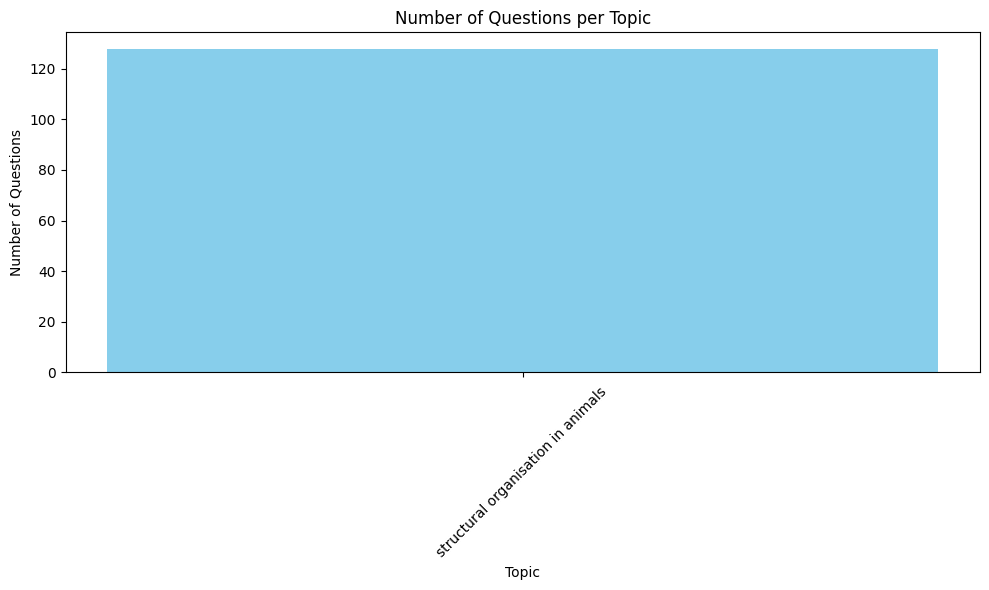

In [131]:
from collections import Counter
# Convert to DataFrames
quiz_df = pd.DataFrame([quiz_data])
questions_df = pd.DataFrame(questions_data)

# Analysis
print("Quiz Overview:")
print(quiz_df)

print("\nQuestions Overview:")
print(questions_df)

# Count topics
topic_count = Counter(questions_df["topic"])
print("\nTopic Frequency:")
print(topic_count)

# Visualization: Questions per Topic
plt.figure(figsize=(10, 6))
plt.bar(topic_count.keys(), topic_count.values(), color='skyblue')
plt.title("Number of Questions per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()